<a href="https://colab.research.google.com/github/mazi1444/MACD-Program/blob/master/MACD_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses the Moving Average Convergence/Divergence (MACD) crossover
#             to determine when to buy and sell on stock.

In [28]:
#Import the liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [29]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving datasets_19256_25044_AAPL.csv to datasets_19256_25044_AAPL (1).csv


In [30]:
#Store data into the df

df = pd.read_csv("datasets_19256_25044_AAPL.csv")

#Set the date to be the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2014-09-29,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...,...
2018-03-05,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
2018-03-12,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
2018-03-19,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
2018-03-26,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


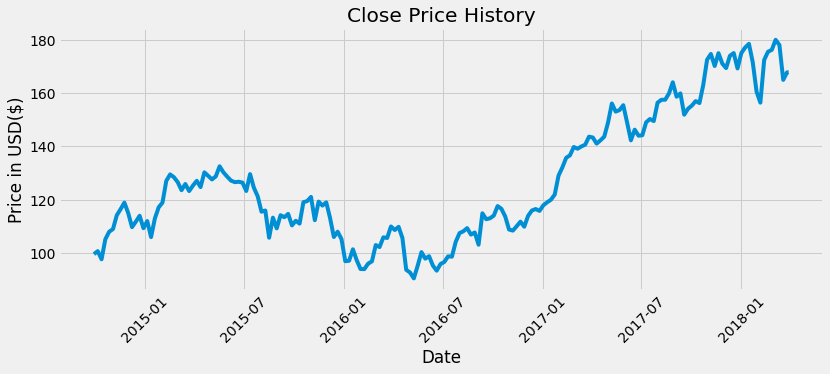

In [31]:
#visually show the stock price

plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title("Close Price History")
plt.xlabel("Date")
plt.ylabel("Price in USD($)")
plt.show()

In [42]:
#Calculate  the MACD and signal line indicators
#Calculate the short term expectional moving average (EMA)

ShortEMA = df.Close.ewm(span=12, adjust = False).mean()

#Calculate the long term expectional moving average

LongEMA = df.Close.ewm(span=26, adjust=False).mean()

#Calculate a MACD line

MACD = ShortEMA - LongEMA
#Calculate signal line
signal = MACD.ewm(span=9, adjust=False).mean()


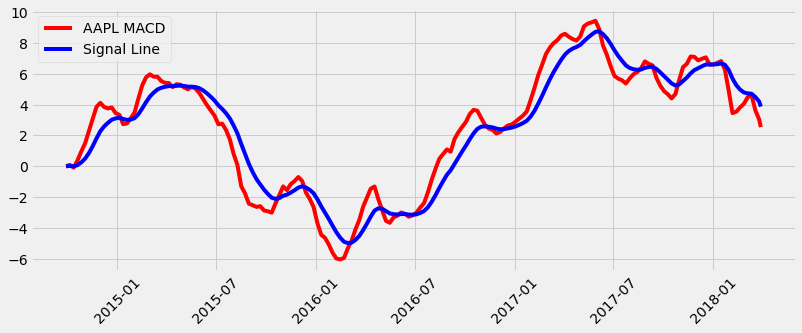

In [43]:
#plot the chart

plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label ="AAPL MACD", color= "red")
plt.plot(df.index, signal, label = "Signal Line", color = "blue")
plt.xticks(rotation = 45)
plt.legend(loc='upper left')
plt.show()

In [44]:
#Create new colums to new date
df["MACD"] = MACD
df["Signal Line"] = signal
#Show the date
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2014-09-29,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700,0.000000,0.000000,NaN,NaN
2014-10-06,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200,0.088547,0.017709,100.730003,NaN
2014-10-13,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800,-0.087191,-0.003271,NaN,97.669998
2014-10-20,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900,0.378396,0.073063,105.220001,NaN
2014-10-27,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600,0.960626,0.250576,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-03-05,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700,4.490403,4.731596,NaN,NaN
2018-03-12,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500,4.624384,4.710154,NaN,NaN
2018-03-19,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700,3.633237,4.494770,NaN,NaN
2018-03-26,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400,3.041845,4.204185,NaN,NaN


In [45]:
#Create the function to signal when to buy or sell ann asset
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal["MACD"][i] > signal["Signal Line"][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal["Close"][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal["MACD"][i] < signal["Signal Line"][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal["Close"][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  return (Buy, Sell)



In [46]:
#Create buy and sell column

a= buy_sell(df)
df["Buy_Signal_Price"] = a[0]
df["Sell_Signal_Price"] = a[1]

In [47]:
#Show the date
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2014-09-29,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700,0.000000,0.000000,NaN,NaN
2014-10-06,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200,0.088547,0.017709,100.730003,NaN
2014-10-13,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800,-0.087191,-0.003271,NaN,97.669998
2014-10-20,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900,0.378396,0.073063,105.220001,NaN
2014-10-27,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600,0.960626,0.250576,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-03-05,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700,4.490403,4.731596,NaN,NaN
2018-03-12,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500,4.624384,4.710154,NaN,NaN
2018-03-19,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700,3.633237,4.494770,NaN,NaN
2018-03-26,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400,3.041845,4.204185,NaN,NaN


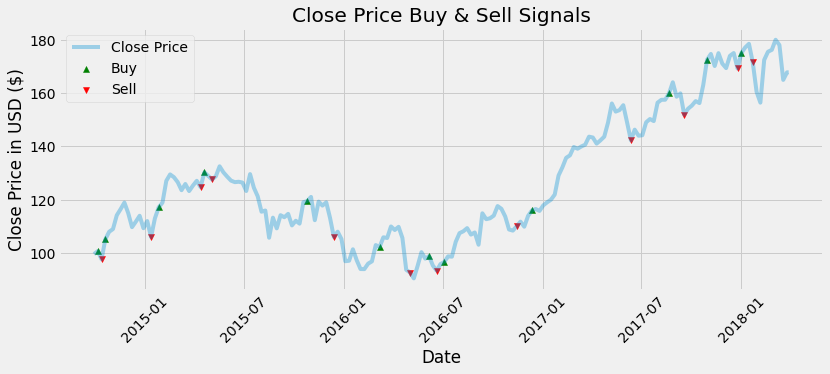

In [50]:
#Visually show the stock buy and sell signals

plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color="green", label = "Buy", marker= '^', alpha = 1)
plt.scatter(df.index, df['Sell_Signal_Price'], color="red", label = "Sell", marker= 'v', alpha = 1)
plt.plot(df["Close"], label = "Close Price", alpha =0.35)
plt.title("Close Price Buy & Sell Signals")
plt.xticks(rotation = 45)
plt.xlabel("Date")
plt.ylabel("Close Price in USD ($)")
plt.legend(loc= 'upper left')
plt.show()
